# Что такое Thread (Поток)?

Thread — это отдельный поток выполнения. Это означает, что в вашей программе могут работать две и более подпрограммы одновременно. Используется для задач ввода-вывода 

## Потоки (Thread)

Стандартная библиотека Python предоставляет библиотеку threading, которая содержит необходимые классы для работы с потоками. Основной класс в этой библиотеки Thread.

Чтобы запустить отдельный поток, нужно создать экземпляр потока Thread и затем запустить его с помощью метода .start():

In [11]:
import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)
    
if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format = format, level = logging.INFO,
                        datefmt = "%H:%M:%S")
    logging.info("Main    : before creating thread")
    
    x = threading.Thread(target = thread_function, args = (1,))
    
    logging.info("Main    : before running thread")
    
    x.start()
    
    logging.info("Main    : wait for the thread to finish")
    logging.info("Main    : all done")

07:50:39: Main    : before creating thread
07:50:39: Main    : before running thread
07:50:39: Thread 1: starting
07:50:39: Main    : wait for the thread to finish
07:50:39: Main    : all done
07:50:41: Thread 1: finishing


Когда мы создаем поток Thread, мы передаем ему функцию и список, содержащий аргументы этой функции. В нашем примере мы говорим Thread, чтобы он запустил функцию thread_function() и передаем ему 1 в качестве аргумента.

Сама по себе функция thread_function() мало что делает. Она просто выводит некоторые сообщения с промежутком time.sleep() между ними.

Стоит обратить внимание на то, что Thread завершил работу после выполнения Main.

## Потоки-демоны

daemon (демон) — это процесс, который работает в фоновом режиме.

Если в программе запущены потоки, которые не являются демонами, то программа будет ожидать завершения этих потоков, прежде чем сможет завершится. Тем не менее, потоки, которые являются демонами, при закрытие программы просто убиваются, в каком бы они состояние ни находились.

Если посмотрить на источники библиотеки threading Python, вы увидите, что threading._shutdown() проходит по всем запущенным потокам и вызывает метод .join() для всех потоков, для которых не установлен флаг daemon.

Создание демонического потока:

x = threading.Thread(target=thread_function, args=(1,), daemon=True)

In [ ]:
import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)
    
if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format = format, level = logging.INFO,
                        datefmt = "%H:%M:%S")
    logging.info("Main    : before creating thread")
    
    x = threading.Thread(target = thread_function, args = (1,),daemon = True)
    
    logging.info("Main    : before running thread")
    
    x.start()
    
    logging.info("Main    : wait for the thread to finish")
    logging.info("Main    : all done")

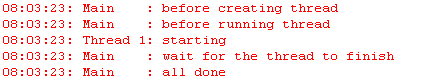

Разница в том, что последняя строка вывода отсутствует (Thread 1: finishing). thread_function() не получил возможность завершиться. Это был демонический поток, поэтому, когда __main__ достиг конца своего кода и программа захотела завершить работу, демон был просто убит.

Чтобы указать одному потоку дождаться завершения другого потока, вам нужно вызывать .join().

In [18]:
import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)
    
if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format = format, level = logging.INFO,
                        datefmt = "%H:%M:%S")
    logging.info("Main    : before creating thread")
    
    x = threading.Thread(target = thread_function, args = (1,),daemon = True)
    
    logging.info("Main    : before running thread")
    
    x.start()
    
    logging.info("Main    : wait for the thread to finish")
    x.join()
    logging.info("Main    : all done")

08:05:33: Main    : before creating thread
08:05:33: Main    : before running thread
08:05:33: Thread 1: starting
08:05:33: Main    : wait for the thread to finish
08:05:35: Thread 1: finishing
08:05:35: Main    : all done


## Работа с несколькими потоками

До сих пор мы рассматривали пример только с двумя потоками: основным потоком и с потоком который мы создали с помощью объекта threading.Thread.


In [23]:
import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)
    
if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    threads = list()
    for index in range(3):
        logging.info("Main    : create and start thread %d.", index)
        x = threading.Thread(target=thread_function, args=(index,))
        threads.append(x)
        x.start()
    for index, thread in enumerate(threads):
        logging.info("Main    : before joining thread %d.", index)
        thread.join()
        logging.info("Main    : thread %d done", index)

08:10:01: Main    : create and start thread 0.
08:10:01: Thread 0: starting
08:10:01: Main    : create and start thread 1.
08:10:01: Thread 1: starting
08:10:01: Main    : create and start thread 2.
08:10:01: Thread 2: starting
08:10:01: Main    : before joining thread 0.
08:10:03: Thread 1: finishing
08:10:03: Thread 0: finishing
08:10:03: Main    : thread 0 done
08:10:03: Main    : before joining thread 1.
08:10:03: Main    : thread 1 done
08:10:03: Main    : before joining thread 2.
08:10:03: Thread 2: finishing
08:10:03: Main    : thread 2 done


Этот код использует тот же механизм, который мы рассмотрели выше, чтобы запустить поток, создать объект Thread, а затем вызывать .start(). В примере мы размещаем все потоки Thread в списке threads, для того что бы можно было бы ожидать их позже, используя .join().

Если  внимательно просмотреть выходные данные, мы увидим, что все три потока запускаются в том порядке, в котором мы ожидаем, но заканчиваются в случайном порядке! Многократные запуски покажут различные результаты.

Порядок выполнения потоков определяется операционной системой и его может быть довольно сложно предсказать. Он может  изменяться от запуска к запуску, поэтому вам следует помнить об этом при разработке алгоритмов, использующих многопоточность.

Возникает проблема, когда два или более потока обращаются к одному фрагменту данных или ресурсу - Race Conditions (условия гонки)

## Lock

Только один поток за раз может использовать обьект Lock. Любой другой поток, который захочет его использовать, должен подождать, пока текущий владелец не завершит свою работу.

Основными методами lock являются .acquire() и .release(). Чтобы получить lock, потоку нужно вызвать my_lock.acquire(). Если блокировка уже удерживается, вызывающий поток будет ждать, пока она не будет снята. Здесь есть важный момент. Если один поток получает блокировку, но никогда не снимает ее, программа зависнет.

В Python Lock может также работать как менеджер контекста, так что вы можете использовать его с with, тогда он будет освобожден автоматически, когда блок with завершится.

Документация: https://docs.python.org/3.5/library/threading.html